In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

# # Input shape for a 6-channel image (assuming 160x576 pixels)
# input_shape = (90, 298, 3)

# # Create a VGG-like model for road recognition
# model = Sequential()

# # Convolutional Blocks (you can adjust the number of filters, etc., based on your requirements)
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Flatten and Fully Connected Layers
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(160 * 576, activation='sigmoid'))  # Output layer for binary road mask
# model.add(Reshape((160, 576, 1)))

# # model.add(Dense(90 * 298, activation='sigmoid'))  # Output layer for binary road mask
# # model.add(Reshape((90, 298, 1)))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Display the model summary
# model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 90, 298, 64)       1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 298, 64)       36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 149, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 149, 128)      73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 149, 128)      147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 22, 74, 128)       0         
 g2D)                                                 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (90, 298, 4)
model = Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Upsampling layers
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Output layer
model.add(layers.Conv2D(1, (1, 1), activation='sigmoid'))



# Instantiate the model
# model = road_detection_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 90, 298, 32)       1184      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 45, 149, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 43, 147, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 21, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 19, 71, 128)       73856     
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 38, 142, 128)     

In [ ]:
#preprocessing
import os
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to load and preprocess the data
def load_and_preprocess_data(training,gt):
    images = []
    masks = []

    # img_0= [f for f in os.listdir(training) if f.endswith(".npy")]
    img_0= [f for f in os.listdir(training) if f.endswith(".png")]

    test_img_0= [f for f in os.listdir(gt) if f.endswith(".png")]

    img_0.sort()
    test_img_0.sort()
    # print(img_0)

    for img, test_img in zip(img_0,test_img_0):
    # Construct the full paths
      img_path= os.path.join(training, img)

      # img_1=np.load(img_path)
      img_1=cv2.imread(img_path)

      img_1= cv2.resize(img_1,(298,90))
      test_img_path= os.path.join(gt, test_img)

      test_image= cv2.imread(test_img_path)
      test_image=cv2.resize(test_image,(576,160))
      # test_image=cv2.resize(test_image,(278,70))


      # cv2_imshow(test_image)

      lower_green = np.array([255, 0, 255], dtype=np.uint8)
      upper_green = np.array([255, 0, 255], dtype=np.uint8)

      # Create a mask using inRange function to filter out green pixels
      mask = cv2.inRange(test_image, lower_green, upper_green)

      images.append(img_1)
      masks.append(mask)

    images = np.array(images, dtype='float32')
    masks = np.array(masks, dtype='float32')  # Assuming binary masks

    return images, masks

    # for filename in os.listdir(os.path.join(data_folder, 'images')):
    #     img_path = os.path.join(data_folder, 'images', filename)
    #     mask_path = os.path.join(data_folder, 'masks', filename.replace('.png', '_mask.png'))

    #     # img = cv2.imread(img_path)
    #     # img = cv2.resize(img, (576, 160))  # Resize images to match the model input size

    #     img = img / 255.0  # Normalize pixel values to [0, 1]

    #     mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    #     mask = cv2.resize(mask, (576, 160))
    #     mask = (mask > 0).astype(np.uint8)  # Convert to binary mask

    #     images.append(img)
    #     masks.append(mask)

    # images = np.array(images, dtype='float32')
    # masks = np.array(masks, dtype='float32')  # Assuming binary masks

    # return images, masks

# Load and preprocess the data
# training_folder = 'drive/My Drive/3DRP project/Project/data_road/training/image_2_6channel' # Change this to the path of your data folder
training_folder = 'drive/My Drive/3DRP project/Project/data_road/testing/image_2' # Change this to the path of your data folder

gt_folder= 'drive/My Drive/3DRP project/Project/data_road/testing/gt_image_2'
images, masks = load_and_preprocess_data(training_folder,gt_folder)

masks.shape
# os.listdir(training_folder)
# Split the data into training and validation sets
# train_images, val_images, train_masks, val_masks = train_test_split(images, masks, random_state=42)


(60, 160, 576)

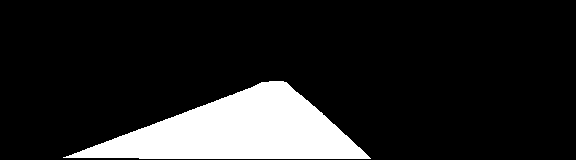

In [ ]:
images.shape
# cv2_imshow(masks[2])

In [ ]:
# Split the data into training and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(images, masks, random_state=42)
train_images.shape

(45, 90, 298, 3)

In [ ]:
# cv2_imshow(val_images[5])


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from keras import models

In [ ]:

# Train the model in batches
batch_size = 8
epochs = 5

steps_per_epoch = len(train_images) // batch_size
model.fit(train_images, train_masks, validation_data=(val_images, val_masks), epochs=epochs, batch_size=batch_size, steps_per_epoch=steps_per_epoch)


# model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=epochs, batch_size=batch_size)

# Save the trained model
model.save('road_recognition_model.h5')

trained_model = models.load_model('road_recognition_model.h5')

# Predict on validation data
predictions = trained_model.predict(val_images)

# Threshold the predictions to obtain binary masks
threshold = 0.5
binary_predictions = (predictions > threshold).astype(np.uint8)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: ignored

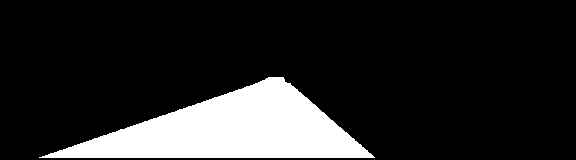

In [ ]:
from google.colab.patches import cv2_imshow

i=5

# original_image = (val_images[i] * 255).astype(np.uint8)
ground_truth_mask = (val_masks[i] )
predicted_mask = (binary_predictions[i] )

# Concatenate the original image, ground truth mask, and predicted mask horizontally
# result_image = np.concatenate([original_image, ground_truth_mask, predicted_mask], axis=1)

# Display or save the result image
# cv2_imshow( original_image)
cv2_imshow(ground_truth_mask)
# cv2_imshow(predicted_mask)

cv2.waitKey(0)  # Press any key to move to the next image

cv2.destroyAllWindows()
